In [1]:
import pandas as pd 

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/SMS-Spam-Detection/master/spam.csv", encoding= 'latin-1')

In [3]:
data.head(10)

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
data.tail(10)

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...,NaN,NaN,NaN
5563,ham,Ard 6 like dat lor.,NaN,NaN,NaN
5564,ham,Why don't you wait 'til at least wednesday to ...,NaN,NaN,NaN
5565,ham,Huh y lei...,NaN,NaN,NaN
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [5]:
data.shape,data.describe()

((5572, 5),
        class                 message  \
 count   5572                    5572   
 unique     2                    5169   
 top      ham  Sorry, I'll call later   
 freq    4825                      30   
 
                                                Unnamed: 2  \
 count                                                  50   
 unique                                                 43   
 top      bt not his girlfrnd... G o o d n i g h t . . .@"   
 freq                                                    3   
 
                    Unnamed: 3 Unnamed: 4  
 count                      12          6  
 unique                     10          5  
 top      MK17 92H. 450Ppw 16"    GNT:-)"  
 freq                        2          2  )

In [6]:
import numpy as np
#delete the columns with nan
data=data.dropna(axis=1)
#data.replace(0, np.nan, inplace= True)
data.head(5)

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# label encoding

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()#creating the instance
data['class']=le.fit_transform(data['class'])
data.head()

,class,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
print(len(data['message']))
print(data['class'].value_counts(normalize=True))

5572
0    0.865937
1    0.134063
Name: class, dtype: float64


# CountVectorizer

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()
messages=v.fit_transform(data['message'])
print(messages.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [10]:
messages.shape

(5572, 8672)

## TFIDF (Term Frequency and Inverse Document Frequency)

Term Frequency=(No. of rep of words in sentence)/(No. of words in sentence)
IDF=(No. of sentences)/(No. of sentences containing words)

In [11]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer()
messagess=cv.fit_transform(data['message']).toarray()
print(messagess)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# train test split

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(messages,data['class'],test_size=0.1)#countervectorizer
X_train,X_test,Y_train,Y_test=train_test_split(messagess,data['class'],test_size=0.1)#tfidf vectorizer

### Oversampling

In [13]:
from imblearn.over_sampling import RandomOverSampler

In [14]:
sampler = RandomOverSampler(sampling_strategy=0.5)
x_over_train,y_over_train = sampler.fit_resample(x_train,y_train)#cv

In [15]:
X_over_train,Y_over_train = sampler.fit_resample(X_train,Y_train)#tfidf

In [16]:
print('CounteVectoriser:\nBefore sampling:\n',y_train.value_counts())
print()
print('After Sampling :\n',y_over_train.value_counts())
print("\n \nTFIDF Vectoriser:\n Before sampling:\n",Y_train.value_counts())
print()
print('After Sampling :\n',Y_over_train.value_counts())

CounteVectoriser:
Before sampling:
 0    4331
1     683
Name: class, dtype: int64

After Sampling :
 0    4331
1    2165
Name: class, dtype: int64

 
TFIDF Vectoriser:
 Before sampling:
 0    4341
1     673
Name: class, dtype: int64

After Sampling :
 0    4341
1    2170
Name: class, dtype: int64


# logistic regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

accuracy=(TP+TN)/Total   
        
Precision=TP/(TP+FP)

Recall=TP/(TP+FN)
      
F1-Score=2*Precision*Recall/(Precision+Recall)

### Before  over sampling

In [18]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)#cv
log_reg.fit(X_train,Y_train)#tfidf
y_pred_lr=log_reg.predict(x_test)#cv
Y_pred_lr=log_reg.predict(X_test)#tfidf
print("Count vectoriser:\n")
print(confusion_matrix(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr,digits=5))
print("\n\nTFIDF:\n")
print(confusion_matrix(Y_test,Y_pred_lr))
print(classification_report(Y_test,Y_pred_lr,digits=5))

Count vectoriser:

[[471  23]
 [  2  62]]
              precision    recall  f1-score   support

           0    0.99577   0.95344   0.97415       494
           1    0.72941   0.96875   0.83221        64

    accuracy                        0.95520       558
   macro avg    0.86259   0.96110   0.90318       558
weighted avg    0.96522   0.95520   0.95787       558



TFIDF:

[[483   1]
 [ 16  58]]
              precision    recall  f1-score   support

           0    0.96794   0.99793   0.98271       484
           1    0.98305   0.78378   0.87218        74

    accuracy                        0.96953       558
   macro avg    0.97549   0.89086   0.92744       558
weighted avg    0.96994   0.96953   0.96805       558



### After Over Sampling

In [19]:
log_reg_over=LogisticRegression()
log_reg_over.fit(x_over_train,y_over_train)#cv
log_reg_over.fit(X_over_train,Y_over_train)#tfidf
y_pred_lr=log_reg_over.predict(x_test)
Y_pred_lr=log_reg_over.predict(X_test)
print("CountVectoriser:\n")
cm_cv=confusion_matrix(y_test,y_pred_lr)
print(cm_cv)
print(classification_report(y_test,y_pred_lr,digits=5))
print("\n\nTFIDF:\n")
cm_tfidfv=confusion_matrix(Y_test,Y_pred_lr)
print(cm_tfidfv)
print(classification_report(Y_test,Y_pred_lr,digits=5))

CountVectoriser:

[[463  31]
 [  0  64]]
              precision    recall  f1-score   support

           0    1.00000   0.93725   0.96761       494
           1    0.67368   1.00000   0.80503        64

    accuracy                        0.94444       558
   macro avg    0.83684   0.96862   0.88632       558
weighted avg    0.96257   0.94444   0.94896       558



TFIDF:

[[483   1]
 [  9  65]]
              precision    recall  f1-score   support

           0    0.98171   0.99793   0.98975       484
           1    0.98485   0.87838   0.92857        74

    accuracy                        0.98208       558
   macro avg    0.98328   0.93816   0.95916       558
weighted avg    0.98212   0.98208   0.98164       558



<AxesSubplot:>

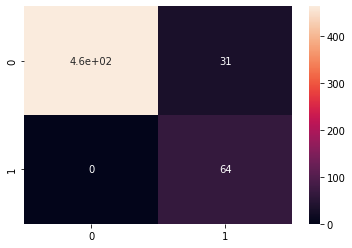

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm_cv,annot=True)

<AxesSubplot:>

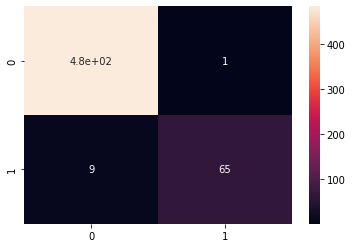

In [21]:
sns.heatmap(cm_tfidfv,annot=True)

In [22]:
from sklearn.metrics import accuracy_score
LR=accuracy_score(Y_test,Y_pred_lr)
print(LR)

0.982078853046595


# Naive bayes 

In [23]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier =MultinomialNB()
NB_classifier.fit(X_over_train , Y_over_train)
y_pred_nb = NB_classifier.predict(X_test)

In [24]:
Y_test.head(),y_pred_nb[0:5]

(4379    0
 150     0
 4887    0
 2307    1
 1896    0
 Name: class, dtype: int64,
 array([0, 0, 0, 1, 0]))

In [25]:
cm=confusion_matrix(Y_test,y_pred_nb)
print(cm)
print(classification_report(Y_test,y_pred_nb,digits=5))

[[483   1]
 [  7  67]]
              precision    recall  f1-score   support

           0    0.98571   0.99793   0.99179       484
           1    0.98529   0.90541   0.94366        74

    accuracy                        0.98566       558
   macro avg    0.98550   0.95167   0.96772       558
weighted avg    0.98566   0.98566   0.98540       558



<AxesSubplot:>

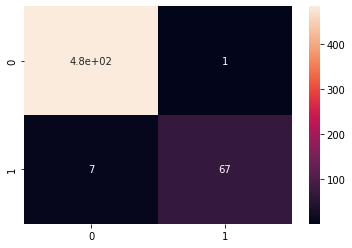

In [26]:
sns.heatmap(cm,annot=True)

In [27]:
NB=accuracy_score(Y_test,y_pred_nb)
print(NB)

0.985663082437276


# Decision tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_over_train,Y_over_train)
y_pred_dt = model.predict(X_test)

In [29]:
Y_test.head(),y_pred_dt[0:5]

(4379    0
 150     0
 4887    0
 2307    1
 1896    0
 Name: class, dtype: int64,
 array([0, 0, 0, 1, 0]))

In [30]:
cm=confusion_matrix(Y_test,y_pred_dt)
print(cm)
print(classification_report(Y_test,y_pred_dt,digits=5))

[[474  10]
 [  7  67]]
              precision    recall  f1-score   support

           0    0.98545   0.97934   0.98238       484
           1    0.87013   0.90541   0.88742        74

    accuracy                        0.96953       558
   macro avg    0.92779   0.94237   0.93490       558
weighted avg    0.97015   0.96953   0.96979       558



<AxesSubplot:>

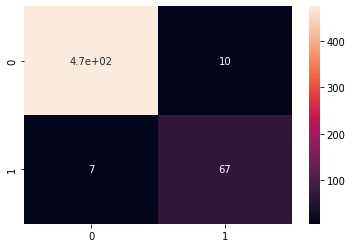

In [31]:
sns.heatmap(cm,annot=True)

In [32]:
DT=accuracy_score(Y_test,y_pred_dt)
print(DT)

0.9695340501792115


# accuracy of all the model

In [33]:
print("Accuracy :\n (a) logistic regression : "+str(LR)+"\n (b) Decision Tree : "+str(DT)+"\n (c) Naive bayes : "+str(NB))


Accuracy :
 (a) logistic regression : 0.982078853046595
 (b) Decision Tree : 0.9695340501792115
 (c) Naive bayes : 0.985663082437276


In [34]:
if((DT>LR) and (DT>NB)):
    print("Decision tree algorithm is much accurate than other two algorithm ie, accuracy(dt)="+str(DT))
elif((LR>DT) and (LR>NB)):
    print("Logistic Regression algorithm is much accurate than other two algorithm ie, accuracy(lr)="+str(LR))
else:
    print("Naive bayes algorithm is much accurate than other two algorithm ie, accuracy(nb)="+str(NB))

Naive bayes algorithm is much accurate than other two algorithm ie, accuracy(nb)=0.985663082437276
